In [1]:
# importing necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

# reading data
data=pd.read_csv('C:/Users/hp 15-r032tx/Downloads/headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [2]:
type(data)

pandas.core.frame.DataFrame

In [3]:
#collecting x and y
x=data['Head Size(cm^3)'].values
y=data['Brain Weight(grams)'].values

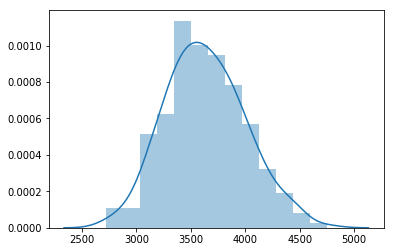

In [4]:
import seaborn as sb
sb.distplot(x)

In [5]:
data['Head Size(cm^3)'].skew()

0.2388065848891712

In [6]:
data['Head Size(cm^3)'].kurt()

-0.1134564707717618

In [7]:
data['Head Size(cm^3)'].describe()

count     237.000000
mean     3633.991561
std       365.261422
min      2720.000000
25%      3389.000000
50%      3614.000000
75%      3876.000000
max      4747.000000
Name: Head Size(cm^3), dtype: float64

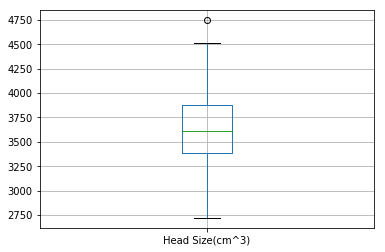

In [8]:
data.boxplot(column="Head Size(cm^3)")

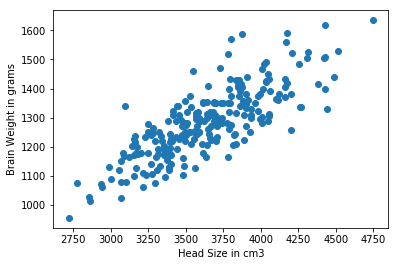

In [9]:
plt.scatter(x,y)
plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.show()

In [10]:
np.corrcoef(x,y)[0,1]

0.7995697092542962

In [11]:
import scipy.stats as stats
stats.pearsonr(x,y)

(0.7995697092542964, 5.957630839405754e-54)

In [12]:
#y=b0+b1x
#mean x and y
mean_x=np.mean(x)
mean_y=np.mean(y)

# total num of values
m=len(x)

#using the formula to calculate b1 and b2
numer=0
denom=0
for i in range(m):
    numer+=(x[i]-mean_x)*(y[i]-mean_y)
    denom+=(x[i]-mean_x)**2
b1=numer/denom
b0=mean_y-(b1*mean_x)

#print coefficients
print(b1,b0)
print(numer)

0.26342933948939945 325.57342104944223
8294376.74683544


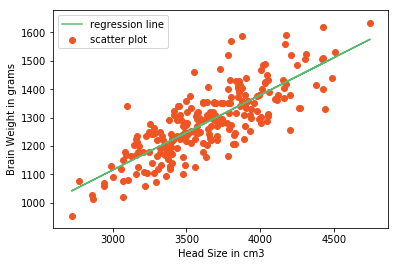

In [13]:
# plotting values and regression line

y_pred=b0+b1*x

#plotting line
plt.plot(x,y_pred, color='#58b970',label='regression line')
#plotting scatter plot
plt.scatter(x,y,c='#ef5423',label='scatter plot')

plt.xlabel('Head Size in cm3')
plt.ylabel('Brain Weight in grams')
plt.legend()
plt.show()

In [14]:
#calculating root mse
rmse=0
for i in range(m):
    y_pred=b0+b1*x[i]
    rmse+=(y[i]-y_pred)**2
rmse=np.sqrt(rmse/m)
print(rmse)
print(y_pred)

72.1206213783709
1218.8623112579958


In [15]:
ss_t=0
ss_r=0
for i in range(m):
    y_pred=b0+b1*x[i]
    ss_t+=(y[i]-mean_y)**2
    ss_r+=(y[i]-y_pred)**2
r2=1-(ss_r/ss_t)
print(r2)

0.6393117199570003


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#cannot use rank 1 matrix in scikit learn
x=x.reshape((m,1))

reg=LinearRegression()

reg=reg.fit(x,y)

y_pred=reg.predict(x)

mse=mean_squared_error(y,y_pred)
rmse=np.sqrt(mse)
r2_score=reg.score(x,y)

print(np.sqrt(mse))
print(r2_score)

72.1206213783709
0.639311719957
